In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
df=pd.read_csv("/content/placement.csv")

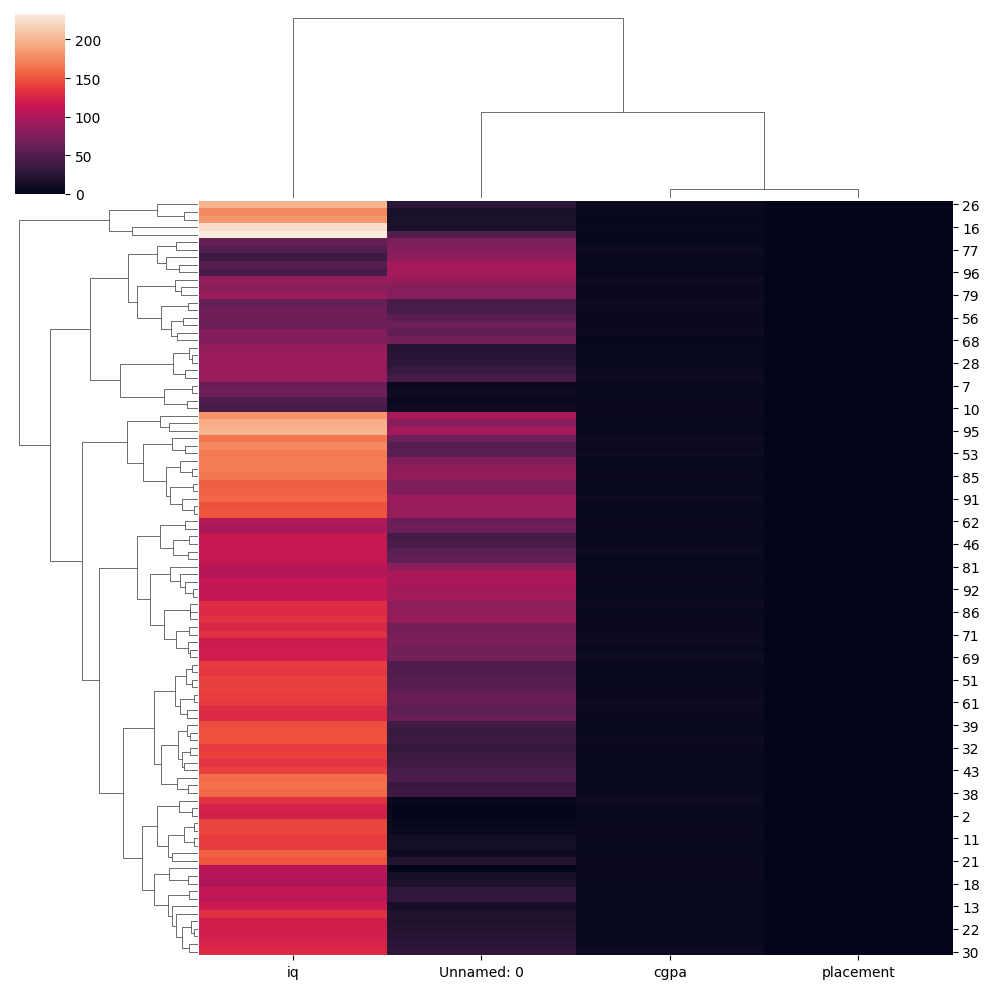

In [ ]:
sns.clustermap(df)

In [ ]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [ ]:
df.shape

(100, 4)

In [ ]:
# Steps

# 0. Preprocess + EDA + Feature Selection
# 1. Extract input and output cols
# 2. Scale the values
# 3. Train test split
# 4. Train the model
# 5. Evaluate the model/model selection
# 6. Deploy the model

In [ ]:
# 0. Preprocessing
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.2 KB


In [ ]:
df=df.iloc[:,1:]

In [ ]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [ ]:
# Exploratory Data Analysis (EDA)
import matplotlib.pyplot as plt

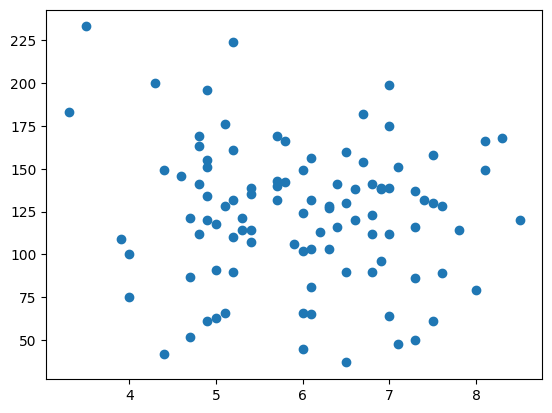

In [ ]:
plt.scatter(df["cgpa"],df["iq"])

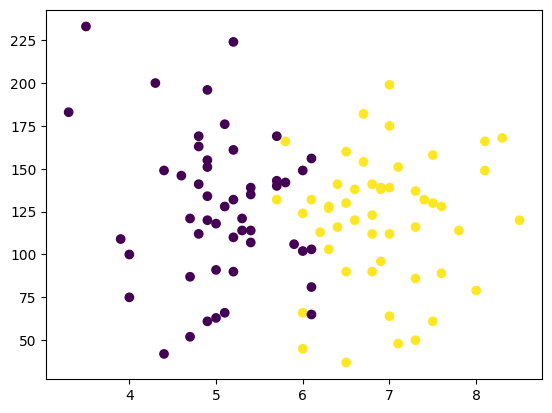

In [ ]:
plt.scatter(df["cgpa"],df["iq"],c=df["placement"])

In [ ]:
# Feature Selection [not required]
# 1. Extract input and output cols
X=df.iloc[:,0:2]
y=df.iloc[:,-1]

In [ ]:
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [ ]:
y

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64

In [ ]:
X.shape

(100, 2)

In [ ]:
y.shape

(100,)

In [ ]:
# 3. Train test split
from sklearn.model_selection import train_test_split

train_test_split(X,y,test_size=0.1)

[    cgpa     iq
 8    6.1  156.0
 13   6.4  116.0
 67   5.0  118.0
 18   4.0  100.0
 10   6.0   45.0
 ..   ...    ...
 66   6.9   96.0
 85   5.8  166.0
 51   4.8  141.0
 56   6.1   65.0
 90   7.3   86.0
 
 [90 rows x 2 columns],
     cgpa     iq
 42   7.6   89.0
 65   8.1  166.0
 80   4.9  196.0
 39   4.6  146.0
 49   5.4  135.0
 14   6.1  103.0
 0    6.8  123.0
 48   6.6  138.0
 69   8.5  120.0
 55   7.8  114.0,
 8     0
 13    1
 67    0
 18    0
 10    1
      ..
 66    1
 85    1
 51    0
 56    0
 90    1
 Name: placement, Length: 90, dtype: int64,
 42    1
 65    1
 80    0
 39    0
 49    0
 14    0
 0     1
 48    1
 69    1
 55    1
 Name: placement, dtype: int64]

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1)

In [ ]:
X_train

,cgpa,iq
1,5.9,106.0
38,6.5,160.0
89,4.9,151.0
14,6.1,103.0
57,6.5,130.0
...,...,...
76,4.9,155.0
39,4.6,146.0
48,6.6,138.0
82,6.5,37.0


In [ ]:
# 2. Scale the values

from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

In [ ]:
X_train=scaler.fit_transform(X_train)

In [ ]:
X_train

array([[-0.01979926, -0.41552554],
       [ 0.51478084,  0.96200114],
       [-0.9107661 ,  0.73241336],
       [ 0.1583941 , -0.49205479],
       [ 0.51478084,  0.19670854],
       [-1.08895947, -1.79305221],
       [-0.19799263,  0.45180607],
       [ 1.49484436, -0.84919134],
       [ 0.1583941 ,  0.85996212],
       [ 0.87116758,  0.40078657],
       [ 0.96026426,  0.42629632],
       [-1.35624952, -2.04814974],
       [ 0.33658747,  0.12017928],
       [ 1.04936094,  0.73241336],
       [-1.80173294, -0.33899628],
       [ 1.22755431, -0.9257206 ],
       [-2.33631305,  1.54872546],
       [-0.82166942, -0.79817183],
       [-1.08895947, -0.90021085],
       [ 0.1583941 , -1.05326937],
       [-0.64347605, -0.31348652],
       [ 0.96026426, -0.26246702],
       [ 0.1583941 ,  0.24772805],
       [ 0.33658747, -0.49205479],
       [-1.71263626, -0.56858405],
       [ 0.87116758,  0.42629632],
       [ 0.78207089, -0.82368159],
       [ 0.24749079, -0.23695726],
       [ 0.06929742,

In [ ]:
X_test

array([[ 2.29671452, -0.05838899],
       [-0.19799263,  0.24772805],
       [ 0.42568416, -0.160428  ],
       [ 0.96026426,  1.95688151],
       [-0.9107661 , -0.05838899],
       [-0.64347605,  2.59462534],
       [ 1.22755431, -0.160428  ],
       [ 1.316651  ,  0.24772805],
       [ 0.1583941 , -1.46142542],
       [ 1.49484436,  0.14568903]])

In [ ]:
X_test=scaler.transform(X_test)

In [ ]:
y_train

1     0
38    1
89    0
14    0
57    1
     ..
76    0
39    0
48    1
82    1
79    1
Name: placement, Length: 90, dtype: int64

In [ ]:
# 4. Train the model

from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()

In [ ]:
clf.fit(X_train,y_train)

LogisticRegression()

In [ ]:
# 5. Evaluate the model/model selection

clf.predict(X_test)

array([1, 0, 1, 1, 0, 0, 1, 1, 1, 1])

In [ ]:
y_pred = clf.predict(X_test)
y_test

69    1
87    1
13    1
26    1
22    0
16    0
72    1
3     1
56    0
30    1
Name: placement, dtype: int64

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test,y_pred)

0.8

In [ ]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

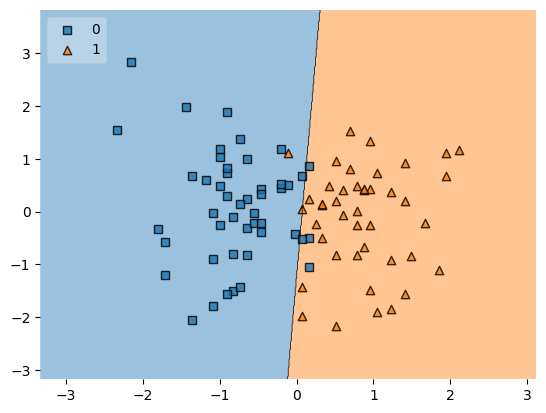

In [ ]:
plot_decision_regions(X_train, y_train.values, clf=clf, legend=2)

In [ ]:
import pickle

In [ ]:
pickle.dump(clf, open("model.pkl","wb"))